In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("netflix.csv")
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['type'].value_counts()
df['country'].value_counts().head(10)
df['listed_in'].value_counts().head(10)


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

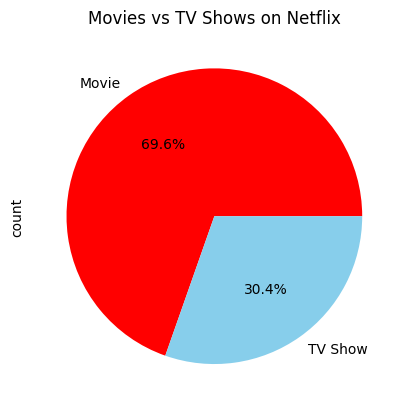

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'skyblue'])
plt.title('Movies vs TV Shows on Netflix')
plt.show()


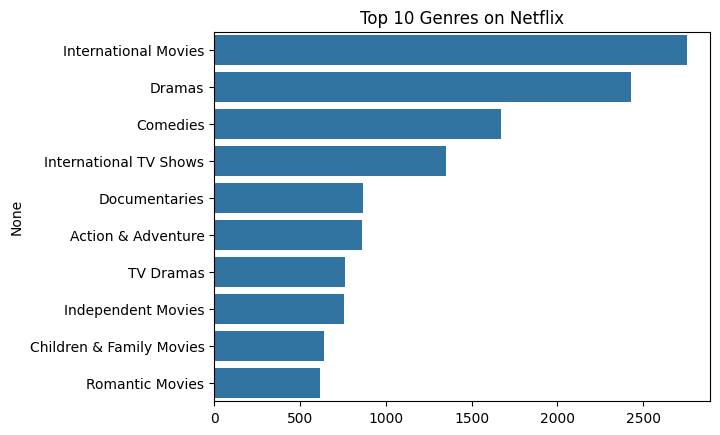

In [ ]:
from collections import Counter
genre_list = df['listed_in'].dropna().str.split(', ')
all_genres = [genre for sublist in genre_list for genre in sublist]
genre_count = pd.Series(all_genres).value_counts().head(10)
sns.barplot(x=genre_count.values, y=genre_count.index)
plt.title('Top 10 Genres on Netflix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1680\3758633666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=df,


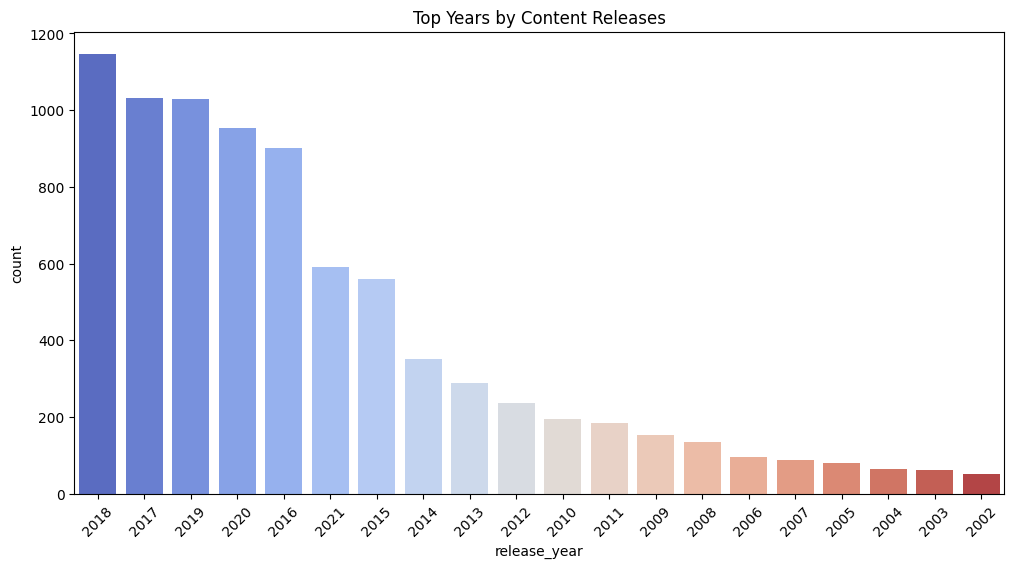

In [ ]:
df = pd.read_csv("netflix.csv")
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=df,
order=df['release_year'].value_counts().index[:20], palette='coolwarm')
plt.title('Top Years by Content Releases')
plt.xticks(rotation=45)
plt.show()

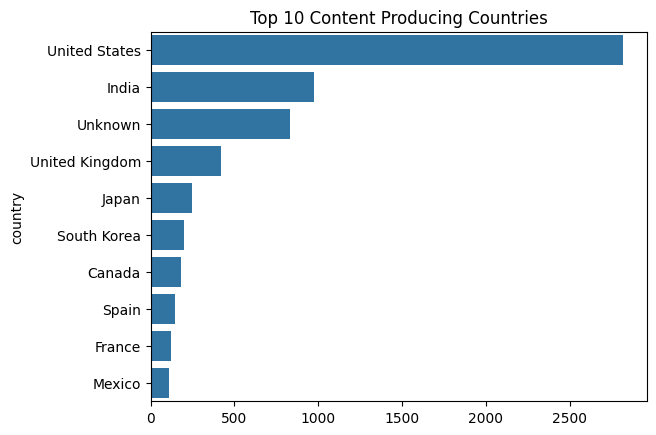

In [ ]:
country_count = df['country'].value_counts().head(10)
sns.barplot(x=country_count.values, y=country_count.index)
plt.title('Top 10 Content Producing Countries')
plt.show()


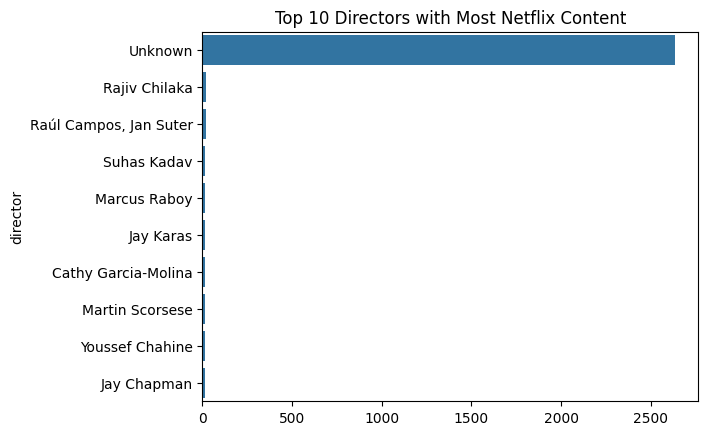

In [ ]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with Most Netflix Content')
plt.show()


In [ ]:
df[df['rating']=='TV-MA']['country'].value_counts().head(10)

country
United States     928
Unknown           276
India             248
United Kingdom    177
Spain             119
Japan              87
South Korea        85
France             80
Mexico             77
Turkey             63
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

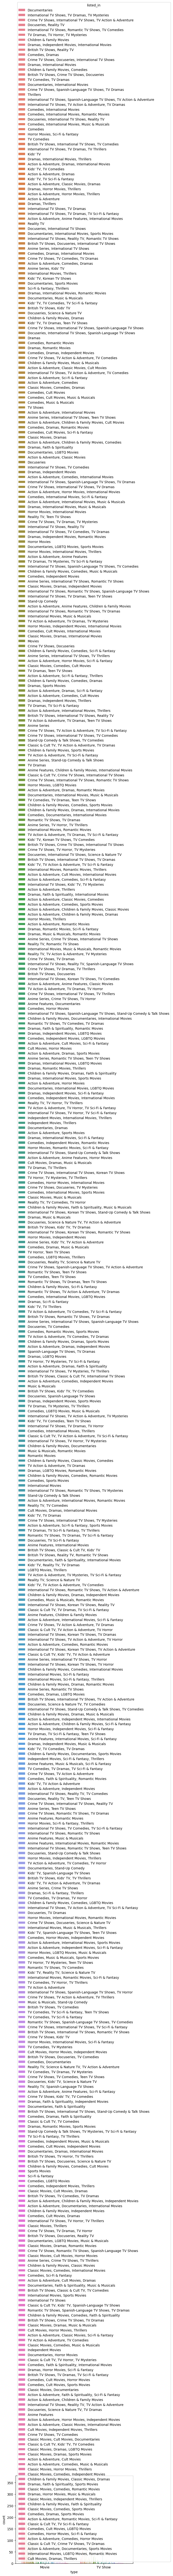

In [ ]:
sns.countplot(data=df, x='type', hue='listed_in')

In [ ]:
df_us = df[df['country'].str.contains('United States', na=False)]
print(df_us)


     show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
7         s8    Movie               Sankofa     Haile Gerima   
9        s10    Movie          The Starling   Theodore Melfi   
15       s16  TV Show     Dear White People          Unknown   
27       s28    Movie             Grown Ups     Dennis Dugan   
...      ...      ...                   ...              ...   
8793   s8794    Movie  Yours, Mine and Ours     Raja Gosnell   
8797   s8798  TV Show             Zak Storm          Unknown   
8802   s8803    Movie                Zodiac    David Fincher   
8804   s8805    Movie            Zombieland  Ruben Fleischer   
8805   s8806    Movie                  Zoom     Peter Hewitt   

                                                   cast  \
0                                               Unknown   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T..

In [ ]:
df['cast'].str.split(',').explode().value_counts().head(10)

cast
Unknown              825
 Anupam Kher          39
 Rupa Bhimani         31
 Takahiro Sakurai     30
 Julie Tejwani        28
 Om Puri              27
Shah Rukh Khan        26
 Rajesh Kava          26
 Paresh Rawal         25
 Boman Irani          25
Name: count, dtype: int64

In [ ]:
import pandas as pd
df = pd.read_csv("netflix.csv")


In [ ]:
df.groupby(['director','listed_in']).size().sort_values(ascending=False).head(10)

director                listed_in                                       
Raúl Campos, Jan Suter  Stand-Up Comedy                                     18
Rajiv Chilaka           Children & Family Movies                            18
Marcus Raboy            Stand-Up Comedy                                     15
Jay Karas               Stand-Up Comedy                                     13
Jay Chapman             Stand-Up Comedy                                     11
Shannon Hartman         Stand-Up Comedy                                      8
S.S. Rajamouli          Action & Adventure, Dramas, International Movies     7
Hidenori Inoue          Action & Adventure, Dramas, International Movies     7
Prakash Satam           Children & Family Movies, Comedies                   7
Ryan Polito             Stand-Up Comedy                                      7
dtype: int64

In [ ]:
4. Duration & Engagement
# Filter only movies

unknown_director = df['director'].isna().sum()
unknown_cast = df['cast'].isna().sum()

print("Titles with unknown director:", unknown_director)
print("Titles with unknown cast:", unknown_cast)


Titles with unknown director: 2634
Titles with unknown cast: 825


In [ ]:
# Calculate average duration
avg_duration = movies['duration_num'].mean()

print("Average movie duration on Netflix:", round(avg_duration, 2), "minutes")


Average movie duration on Netflix: 99.58 minutes


In [ ]:
print("Most common seasons:", df[df.type=="TV Show"]['duration'].str.extract('(\d+)').astype(float).mode()[0][0])

Most common seasons: 1.0


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18452\4251964910.py:1: SyntaxWarning: invalid escape sequence '\d'
  print("Most common seasons:", df[df.type=="TV Show"]['duration'].str.extract('(\d+)').astype(float).mode()[0][0])


Text(0.5, 1.0, 'Trend in Movie Durations')

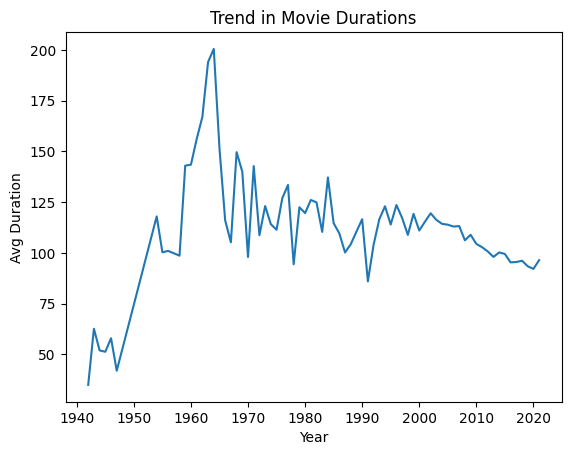

In [ ]:
import matplotlib.pyplot as plt
m = df[df.type=="Movie"].copy()
m['dur'] = m['duration'].str.replace(' min','').astype(float)
plt.plot(m.groupby('release_year')['dur'].mean()); plt.xlabel('Year'); plt.ylabel('Avg Duration'); plt.title('Trend in Movie Durations')


In [ ]:
#5. Content Launch Strategy
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')


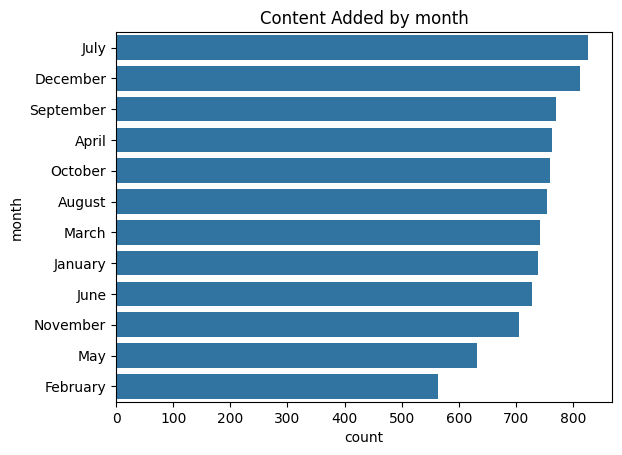

In [ ]:
import seaborn as sns
df['month'] = df['date_added'].dt.month_name()
sns.countplot(y='month', data=df, order=df['month'].value_counts().index)
plt.title("Content Added by month")
plt.show()


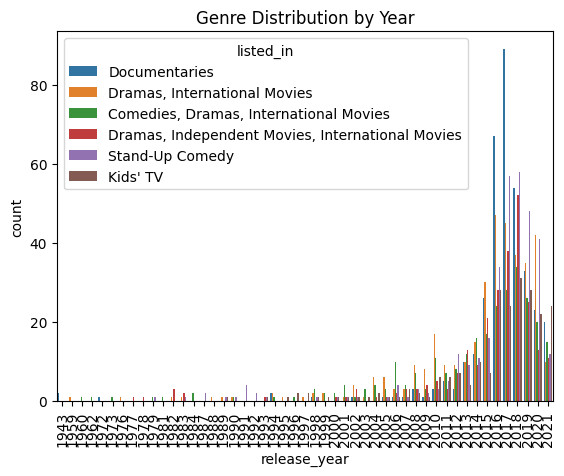

In [ ]:
top_genres = df['listed_in'].value_counts().head(6).index
df1 = df[df['listed_in'].isin(top_genres)]
sns.countplot(data=df1, x='release_year', hue='listed_in')
plt.title("Genre Distribution by Year")
plt.xticks(rotation=90)
plt.show()


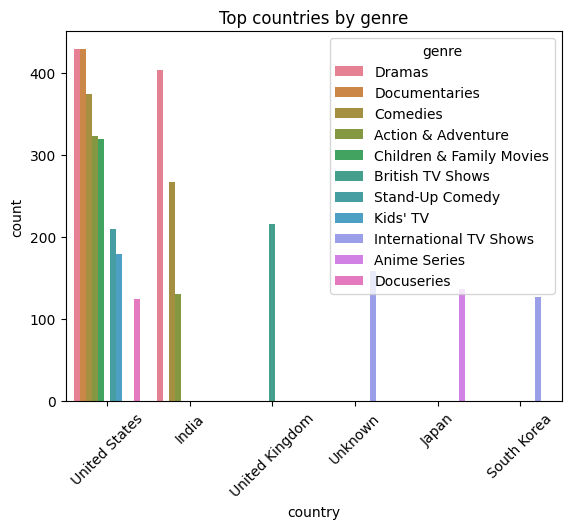

In [ ]:
df['country'] = df['country'].fillna('Unknown').str.split(',').str[0]
df['genre'] = df['listed_in'].str.split(',').str[0]
top = df.groupby(['country','genre']).size().reset_index(name='count').sort_values('count', ascending=False).head(15)
sns.barplot(x='country', y='count', hue='genre', data=top)
plt.title("Top countries by genre")
plt.xticks(rotation=45)
plt.show()
